In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
df = pd.read_excel(r'Clinical_Data_Validation_Cohort.xlsx')

In [3]:
df.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,None,1,NaN,NaN
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,None,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,None,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,None,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,None,1,Negative,Negative


In [4]:
# Descriptive statistics
print(df.describe())

       Survival time (days)  Event (death: 1, alive: 0)  Tumor size (cm)  \
count             95.000000                   95.000000        95.000000   
mean            1471.515789                    0.410526         2.854737   
std              681.642133                    0.494539         1.365281   
min               50.000000                    0.000000         1.100000   
25%              898.500000                    0.000000         2.000000   
50%             1760.000000                    0.000000         2.400000   
75%             1981.000000                    1.000000         3.500000   
max             2532.000000                    1.000000         7.000000   

           Grade        Age  Pack per year      batch  
count  95.000000  95.000000      95.000000  95.000000  
mean    2.368421  66.589474      29.253684   2.431579  
std     0.602347   9.698097      26.205783   0.807579  
min     1.000000  48.000000       0.000000   1.000000  
25%     2.000000  60.000000       2

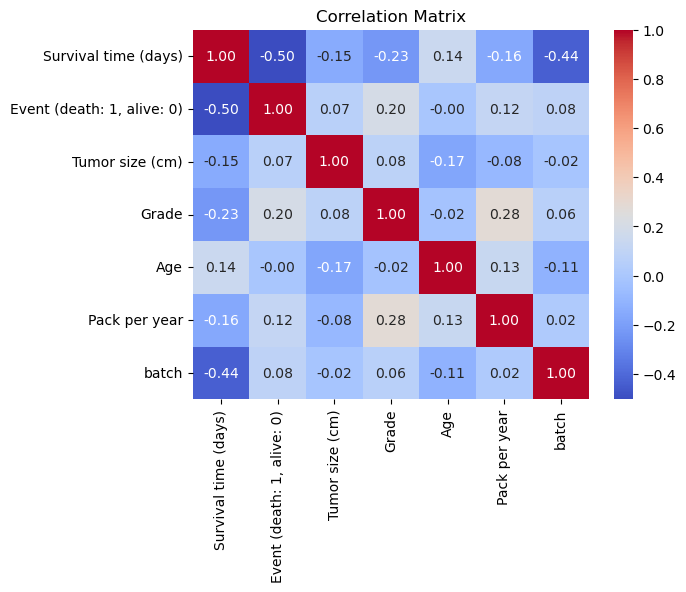

In [5]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [6]:
# T-test for continuous variables by Event (death: 1, alive: 0)
continuous_cols = ["Survival time (days)", "Tumor size (cm)", "Age", "Pack per year"]
for col in continuous_cols:
    alive = df[df["Event (death: 1, alive: 0)"] == 0][col]
    deceased = df[df["Event (death: 1, alive: 0)"] == 1][col]
    t_stat, p_val = ttest_ind(alive, deceased)
    print(f"T-test for {col}: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

T-test for Survival time (days): t-statistic = 5.62, p-value = 0.0000
T-test for Tumor size (cm): t-statistic = -0.63, p-value = 0.5275
T-test for Age: t-statistic = 0.04, p-value = 0.9661
T-test for Pack per year: t-statistic = -1.14, p-value = 0.2586


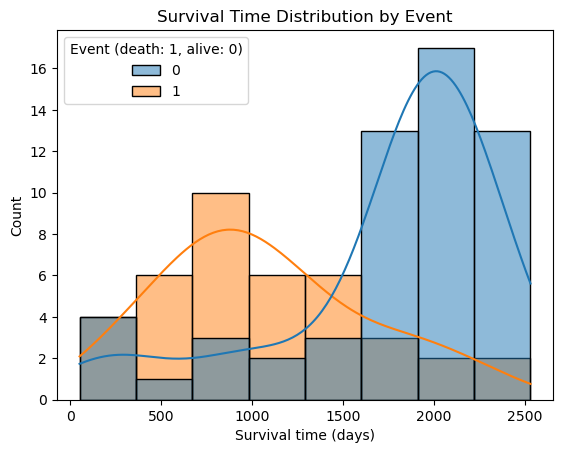

In [7]:
# Visualizations_Histogram
sns.histplot(data=df, x="Survival time (days)", kde=True, hue="Event (death: 1, alive: 0)")
plt.title("Survival Time Distribution by Event")
plt.show()

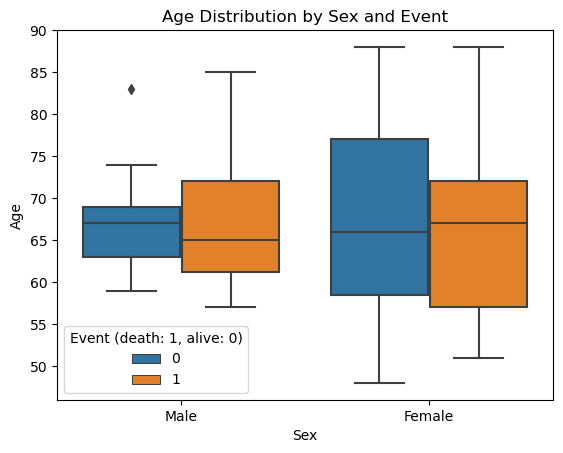

In [8]:
# Visualizations_Boxplot
sns.boxplot(data=df, x="Sex", y="Age", hue="Event (death: 1, alive: 0)")
plt.title("Age Distribution by Sex and Event")
plt.show()

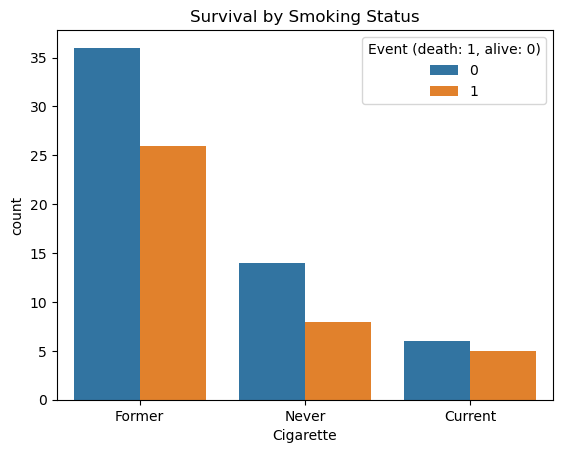

In [9]:
# Visualizations_Countplot
sns.countplot(data=df, x="Cigarette", hue="Event (death: 1, alive: 0)")
plt.title("Survival by Smoking Status")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# Drop columns not needed for prediction
X = df.drop(['Patient ID', 'Event (death: 1, alive: 0)'], axis=1)
y = df['Event (death: 1, alive: 0)']

In [12]:
# Handle categorical variables (if any) using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5263157894736842
              precision    recall  f1-score   support

           0       0.50      0.89      0.64         9
           1       0.67      0.20      0.31        10

    accuracy                           0.53        19
   macro avg       0.58      0.54      0.47        19
weighted avg       0.59      0.53      0.47        19



In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Predictions on the test set
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Initialize and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
gb_y_pred = gb_model.predict(X_test_scaled)

# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("\nGradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_y_pred))

Random Forest Accuracy: 0.5789473684210527
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69         9
           1       1.00      0.20      0.33        10

    accuracy                           0.58        19
   macro avg       0.76      0.60      0.51        19
weighted avg       0.78      0.58      0.50        19


Gradient Boosting Accuracy: 0.631578947368421
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.80      0.40      0.53        10

    accuracy                           0.63        19
   macro avg       0.69      0.64      0.61        19
weighted avg       0.69      0.63      0.61        19



In [19]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the data
rf_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Score for Random Forest:", rf_grid_search.best_score_)

# Similarly, you can perform Grid Search for Gradient Boosting

# Define hyperparameters grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

# Initialize Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the data
gb_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
print("\nBest Parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best Score for Gradient Boosting:", gb_grid_search.best_score_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Random Forest: 0.7633333333333334

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Score for Gradient Boosting: 0.6983333333333334
